<a href="https://colab.research.google.com/github/UesleyCarossi/colorizando-fotos/blob/master/one-piece.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/awarischool/br-data-science/master/image-colorizer/deoldify_wrapper.py

--2020-11-19 11:45:47--  https://raw.githubusercontent.com/awarischool/br-data-science/master/image-colorizer/deoldify_wrapper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2623 (2.6K) [text/plain]
Saving to: ‘deoldify_wrapper.py’

deoldify_wrapper.py 100%[===================>]   2.56K  --.-KB/s    in 0s      

2020-11-19 11:45:47 (34.0 MB/s) - ‘deoldify_wrapper.py’ saved [2623/2623]



In [2]:
from deoldify_wrapper import DeOldify

deo = DeOldify()

  Importing Libraries
No module named 'deoldify'
DeOldify not found, installing..
  Cloning DeOldify Repository...
  Opening DeOldify Folder
  Importing Libraries


/content/deoldify_wrapper.py:36: UserWarning: WARNING: GPU not available. Activate it on Colab at Edit > Notebook Settings
  warnings.warn('WARNING: GPU not available. Activate it on Colab at Edit > Notebook Settings')


  Installing Colab requirements...
  Importing DeOldify Visualize module and FastAI
  Initializing Colorizer


/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth



Done!


In [6]:
class MyDrive:
  from os import path, makedirs, remove

  DRIVE_TEMP_PATH = '/content/drive/My Drive/'
  DRIVE_TEMP_PATH_SAFE = '/content/drive/\'My Drive\'/'
  
  def saveImg(img, path):
    pathFormat = '{}{}'.format(DRIVE_TEMP_PATH, path)
    if not path.exists(pathFormat):
      makedirs(pathFormat)
    img.save(pathFormat)

  def delImg(path):
    pathFormat = '{}{}'.format(DRIVE_TEMP_PATH, path)
    if path.exists(pathFormat):
      remove(pathFormat)

class MyGoogleCloudStorage:
  from google.colab import drive

  ENDPOINT_STORAGE = 'https://storage.googleapis.com/'

  def __init__(self, projectId, bucketName):
    self.projectId = projectId
    self.bucketName = bucketName

  def saveImg(path, file):
    !gcloud config set project {PROJECT_ID}
    !gsutil cp '{}{}'.format(path, file) gs://{BUCKET_NAME}/
    return '{}{}/{}'.format(ENDPOINT_STORAGE, bucket_name, file)
  
  def delImg(file):
    !gcloud config set project {PROJECT_ID}
    !gsutil rm gs://{BUCKET_NAME}/{file}
  

def colorizeWithRequest(filepath_or_url=None, render_factor = 35, compare=True):
  import io
  import urllib.request
  from PIL import Image
  from uuid import uuid4
  
  HEADER = {
      'User-Agent': 'Chrome/23.0.1271.64 Safari/537.11',
      'Accept': '*/*;q=0.8'
    }
  req = urllib.request.Request(filepath_or_url, headers=HEADER)
  
  with urllib.request.urlopen(req) as f:
    img = Image.open(io.BytesIO(f.read()))
    
  FOLDER = 'temp/'
  imageName = '{}.{}'.format(str(uuid.uuid4()), img.format)
  finalPath = '{}{}'.format(FOLDER, imageName)

  myDrive = MyDrive('temp/')
  myGoogleCloudStorage = MyGoogleCloudStorage('temp-project-uesley','temp-image-uesley')
  
  myDrive.saveImg(img, finalPath)
  publicURL = myGoogleCloudStorage.saveImg('{}{}'.format(myDrive.DRIVE_TEMP_PATH_SAFE, FOLDER), imageName)
  myDrive.delImg(finalPath)
  
  deo.colorize(publicURL, render_factor, compare)
  
  myGoogleCloudStorage.delImg(imageName)
  

def colorizeWrapper(filepath_or_url=None, render_factor = 35, compare=True):
  try:
    deo.colorize(filepath_or_url, render_factor, compare)
  except Exception as e:
    colorizeWithRequest(filepath_or_url, render_factor, compare)

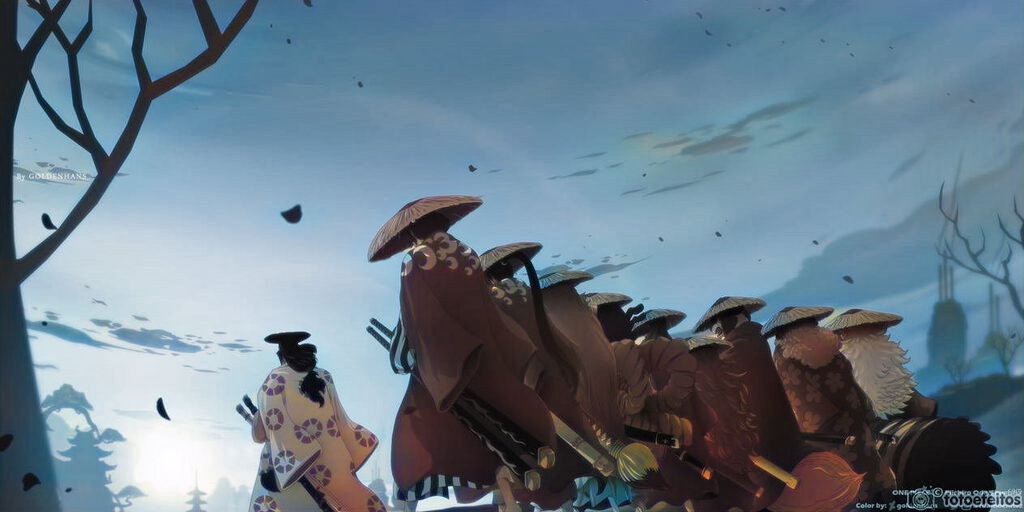

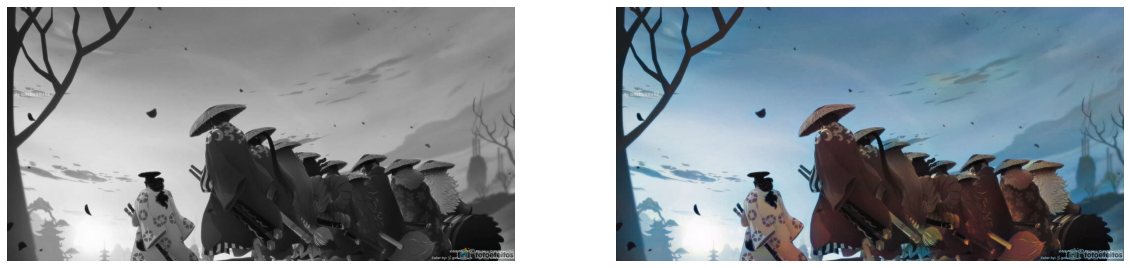

In [7]:
colorizeWrapper('https://storage.googleapis.com/uesley-image/oden-nove-bainhas-vermelhas.jpg')

# "One Piece - Kozuki Oden com os nove bainhas vermelhas"
> "Foto coloriza por redes neurais de Oden e seus retentores."

- author: Uesley J. Carossi
- toc: false
- branch: master
- badges: true
- comments: true
- categorias: [anime, one piece, oden, nove bainhas vermelhas]